# Detección de anomalías

En esta tarea se buscarán las imágenes del conjunto de MNIST que sean más *raras*. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

In [2]:
#| echo: false
#| output: false

def show_anomalies(anomal, anomal_y):
    fig=plt.figure(figsize=(4, 5))
    columns = 4
    rows = 4
    c = 0
    for im, im_y in zip(anomal, anomal_y):
        fig.add_subplot(rows, columns, c + 1)
        plt.imshow(im.reshape(28,28))
        plt.title(im_y)
        plt.xticks([])
        plt.yticks([])
        c += 1
        if c>15:
            break
    plt.show()

Leemoes el conjunto de datos. Trabajaremos con los primeros 10000 ejemplos para que los cálculos no tarden mucho. También dividimos entre 255 para tener valores entre 0 y 1.

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False)
X = mnist.data[0:10000] / 255
y = mnist.target.astype(np.uint8)[0:10000]

X.shape, y.shape

((10000, 784), (10000,))

## Local Outlier Factor
1. Usar Local Outlier Factor con `n_neighbors`=4 para detectar anomalías. Contar cuántas imágenes de cada categoría se clasificaron como anómalas.
2. Mostrar cuáles con los índices de las primeras 16 anomalías encontradas.
3. En una imagen (en una array de 4x4), mostrar las primeras 16 anomalías encontradas.

In [80]:
#| echo: false
#| output: false
clf = LocalOutlierFactor(n_neighbors=4, )
pred = clf.fit_predict(X)
outliers = (pred == -1)
outliers.sum()

np.int64(119)

In [81]:
#| echo: false
#| output: false
np.where(outliers==True)[0][0:16]

array([ 53,  61,  67,  70, 132, 180, 212, 240, 318, 444, 472, 558, 588,
       627, 644, 674])

(array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([26, 30,  7, 18,  5,  2, 11, 17,  3]))


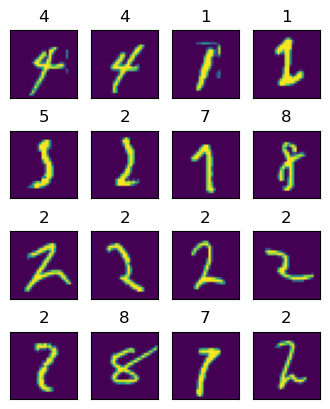

In [82]:
#| echo: false
#| output: false
anomal = X[outliers]
anomal_y = y[outliers]
print(np.unique(anomal_y, return_counts=True))

show_anomalies(anomal, anomal_y)

## DBSCAN
1. Usar DBSCAN con `eps`=6.8 y `min_samples`=2 para detectar anomalías. Contar cuántas imágenes de cada categoría se clasificaron como anómalas.
2. Mostrar cuáles con los índices de las primeras 16 anomalías encontradas.
3. En una imagen (en una array de 4x4), mostrar las primeras 16 anomalías encontradas.


In [86]:
#| echo: false
#| output: false
pred = DBSCAN(eps=6.8, min_samples=2).fit_predict(X)
outliers = (pred == -1)
outliers.sum()

np.int64(332)

In [87]:
#| echo: false
#| output: false
np.where(outliers==True)[0][0:16]

array([ 28,  68, 111, 120, 306, 386, 391, 504, 517, 528, 544, 622, 626,
       627, 670, 704])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([21,  2, 63, 51, 16, 38, 21, 12, 87, 21]))


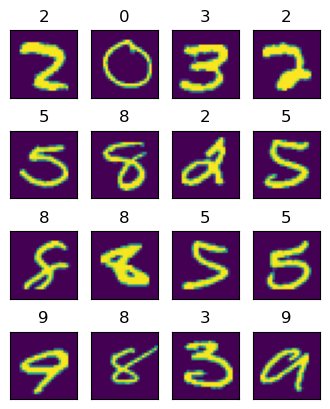

In [88]:
#| echo: false
#| output: false
anomal = X[outliers]
anomal_y = y[outliers]
print(np.unique(anomal_y, return_counts=True))
show_anomalies(anomal, anomal_y)

## SVM de una clase
1. Usar OneClassSVM con `kernel`=rbf y `nu`=0.1. Usar `decision_function` para mostrar las 16 imágenes más raras (más alejadas al hiperplano separador) en una imagen (en una array de 4x4).
2. Mostrar los índices de las 16 imágenes más raras.

In [89]:
#| echo: false
#| output: false
clf = OneClassSVM(kernel='rbf', nu=.1).fit(X)
pred = clf.predict(X)
outliers = (pred == -1)
outliers.sum()

np.int64(1002)

In [90]:
#| echo: false
#| output: false
decision_scores = clf.decision_function(X)
rare = np.argsort(decision_scores)
rare[0:16]

array([1448, 5972, 2019, 9699, 8586, 1466, 8453, 2292, 3607, 4841,  875,
       2073, 3106, 4801, 4875, 4114])

(array([0, 2, 3, 4, 6, 7, 8, 9], dtype=uint8), array([4, 5, 2, 2, 2, 3, 1, 1]))


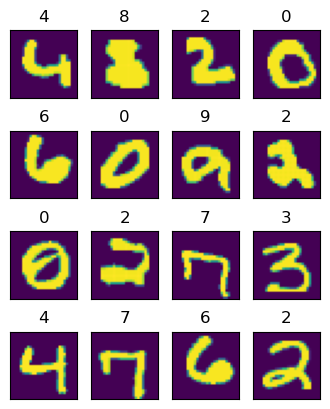

In [140]:
#| echo: false
#| output: false
anomal = X[rare[0:20]]
anomal_y = y[rare[0:20]]
print(np.unique(anomal_y, return_counts=True))
show_anomalies(anomal, anomal_y)

## Isolation Forest
1. Usar IsolationForest con `contamination`=0.05 y `random_state`=42. Usar `decision_function` para mostrar las 16 imágenes más raras (más alejadas al hiperplano separador) en una imagen (en una array de 4x4).
2. Mostrar los índices de las 16 imágenes más raras.

In [93]:
#| echo: false
#| output: false
clf = IsolationForest(contamination=0.05, random_state=42).fit(X)
pred = clf.predict(X)
outliers = (pred == -1)
outliers.sum()

np.int64(500)

[5972 9687 8493 3106 9699 3607 4909 8586 4820 9717 3698 9440 5469 9142
  121 4773]
(array([0, 2, 4, 5, 7, 8, 9], dtype=uint8), array([12,  2,  1,  1,  1,  2,  1]))


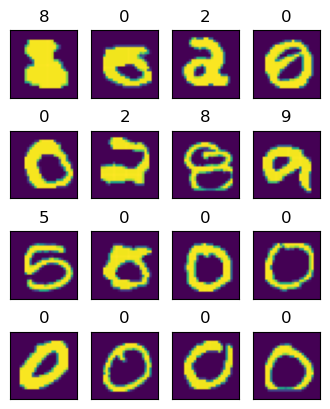

In [94]:
#| echo: false
#| output: false
decision_scores = clf.decision_function(X)
rare = np.argsort(decision_scores)
print(rare[0:16])
anomal = X[rare[0:20]]
anomal_y = y[rare[0:20]]
print(np.unique(anomal_y, return_counts=True))
show_anomalies(anomal, anomal_y)